In [61]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,confusion_matrix,plot_confusion_matrix,plot_roc_curve

In [43]:
df=pd.read_csv("glass.data",names=["refractive index","Sodium","Magnesium","Aluminum","Silicon","Potassium","Calcium","Barium","Iron","Types of glass"])
df.head()

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Types of glass
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [44]:
df.isnull().sum()


refractive index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Types of glass      0
dtype: int64

In [80]:
df.shape

(214, 10)

In [45]:
df.dtypes

refractive index    float64
Sodium              float64
Magnesium           float64
Aluminum            float64
Silicon             float64
Potassium           float64
Calcium             float64
Barium              float64
Iron                float64
Types of glass        int64
dtype: object

In [46]:
#no of glasses on different types!
df["Types of glass"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Types of glass, dtype: int64

<AxesSubplot:>

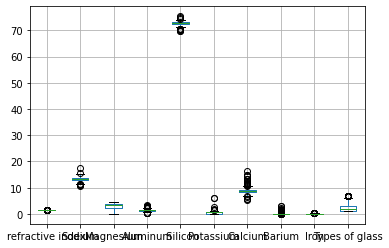

In [27]:
df.boxplot()

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Silicon', ylabel='Density'>

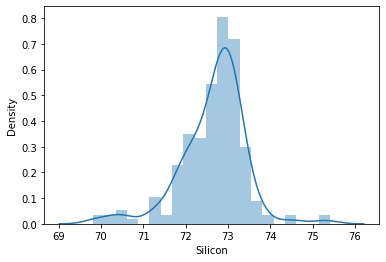

In [48]:
sns.distplot(df["Silicon"])

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Calcium', ylabel='Density'>

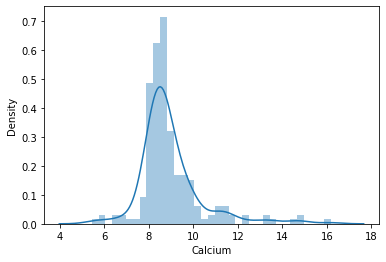

In [79]:
sns.distplot(df["Calcium"])

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
refractive index,214.0,1.518365,0.003037,1.51115,1.516523,1.51768,1.519157,1.53393
Sodium,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Magnesium,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Aluminum,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Silicon,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
Potassium,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Calcium,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Barium,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Iron,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Types of glass,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


In [50]:
df.corr()

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Types of glass
refractive index,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Sodium,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Magnesium,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Aluminum,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Silicon,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
Potassium,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Calcium,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Barium,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Iron,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Types of glass,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


<AxesSubplot:>

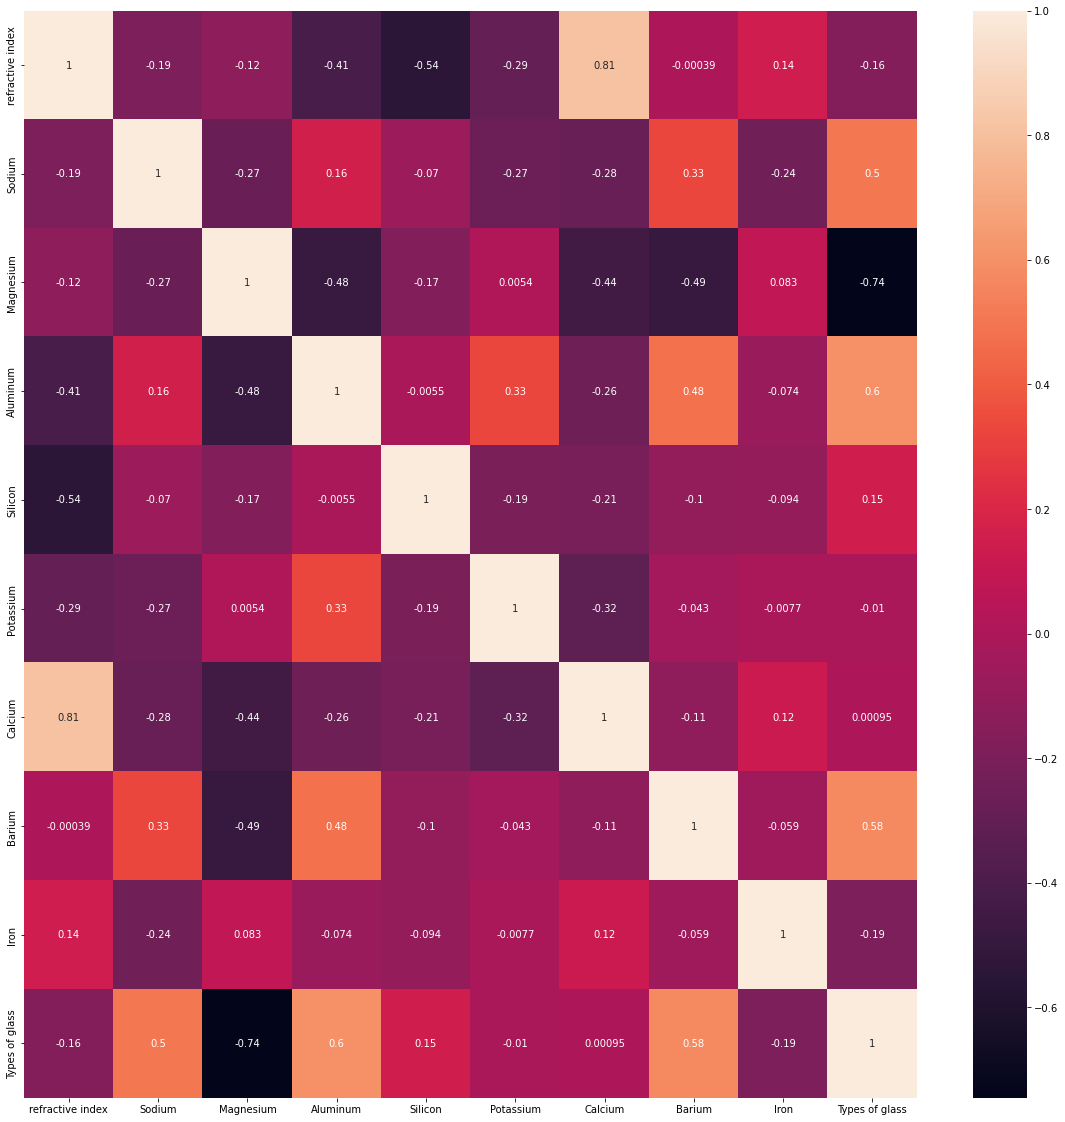

In [51]:

plt.figure(figsize=(20,20))
#for better visualiztion of correlation | use sns.heatmap()
sns.heatmap(df.corr(),annot=True)

In [54]:
X=df[["Sodium","Magnesium","Aluminum","Silicon","Barium","Iron"]].values
y=df["Types of glass"].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [55]:
scaler=StandardScaler()
scaler.fit(X_train,y_train)
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [56]:
scaler.var_

array([0.65483124, 1.89061804, 0.23300117, 0.60156379, 0.22014522,
       0.00912006])

In [57]:
X_train_scaled


array([[ 0.11324217,  0.70605127, -0.53863466,  0.4606098 , -0.31246659,
        -0.59459899],
       [ 1.91745664, -2.01395373,  0.91153558,  0.61532764,  2.62873272,
        -0.59459899],
       [-0.07212233,  0.41514165,  0.2278839 , -0.63530826, -0.31246659,
        -0.59459899],
       ...,
       [ 0.38511011, -2.01395373, -0.14501702, -1.79569208, -0.31246659,
         0.45253209],
       [ 0.31096431,  0.64059661, -1.61590399,  0.47350295, -0.31246659,
        -0.59459899],
       [-3.285107  , -2.01395373,  1.38802009, -3.63941305,  6.40114053,
         2.33736803]])

In [81]:
for i in range(1,11):
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train_scaled,y_train) # training the model
  print("K value  : " , i, "trainscore:",knn.score(X_train_scaled,y_train)," trainscore : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=6,scoring="accuracy")))

K value  :  1 trainscore: 1.0  trainscore :  0.63752052545156
K value  :  2 trainscore: 0.7660818713450293  trainscore :  0.6728243021346471
K value  :  3 trainscore: 0.783625730994152  trainscore :  0.6192528735632185
K value  :  4 trainscore: 0.7543859649122807  trainscore :  0.6607142857142857
K value  :  5 trainscore: 0.7426900584795322  trainscore :  0.6607142857142857
K value  :  6 trainscore: 0.7309941520467836  trainscore :  0.625615763546798
K value  :  7 trainscore: 0.7192982456140351  trainscore :  0.6260262725779967
K value  :  8 trainscore: 0.695906432748538  trainscore :  0.6377257799671593
K value  :  9 trainscore: 0.7134502923976608  trainscore :  0.6145320197044335
K value  :  10 trainscore: 0.695906432748538  trainscore :  0.6089901477832512


In [82]:
knn = KNeighborsClassifier(5) # k - hyperparaqmeter
knn.fit(X_train_scaled,y_train)
knn.score(X_test_scaled,y_test) # score - Accuracy here.. of test score.

0.627906976744186

In [83]:
y_pred=knn.predict(X_test_scaled)
y_pred

array([1, 1, 7, 2, 1, 7, 7, 2, 1, 7, 1, 2, 1, 1, 2, 6, 5, 7, 2, 2, 7, 7,
       1, 2, 1, 1, 7, 2, 1, 2, 1, 2, 5, 1, 1, 1, 2, 2, 6, 1, 6, 2, 1],
      dtype=int64)

In [87]:
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : ",cm)

confusion matrix :  [[10  2  0  0  0  0]
 [ 4  8  0  1  1  0]
 [ 3  1  0  0  0  0]
 [ 0  2  0  1  0  1]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  1  7]]


In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.59      0.83      0.69        12
           2       0.62      0.57      0.59        14
           3       0.00      0.00      0.00         4
           5       0.50      0.25      0.33         4
           6       0.33      1.00      0.50         1
           7       0.88      0.88      0.88         8

    accuracy                           0.63        43
   macro avg       0.49      0.59      0.50        43
weighted avg       0.58      0.63      0.59        43



C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
#manhattan
manh_knn=KNeighborsClassifier(n_neighbors=4,metric="manhattan")
manh_knn.fit(X_train_scaled,y_train)
manh_pred=manh_knn.predict(X_test_scaled)
print(classification_report(y_test,manh_pred))
print("ACCURACY:",accuracy_score(y_test,manh_pred))

              precision    recall  f1-score   support

           1       0.56      0.83      0.67        12
           2       0.77      0.71      0.74        14
           3       0.00      0.00      0.00         4
           5       1.00      0.25      0.40         4
           6       0.33      1.00      0.50         1
           7       0.88      0.88      0.88         8

    accuracy                           0.67        43
   macro avg       0.59      0.61      0.53        43
weighted avg       0.67      0.67      0.64        43

ACCURACY: 0.6744186046511628


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
seq_knn=KNeighborsClassifier(n_neighbors=6,metric="sqeuclidean")
seq_knn.fit(X_train_scaled,y_train)
seq_pred=seq_knn.predict(X_test_scaled)
print(classification_report(y_test,seq_pred))
print("ACCURACY:",accuracy_score(y_test,seq_pred))

              precision    recall  f1-score   support

           1       0.55      0.92      0.69        12
           2       0.67      0.43      0.52        14
           3       0.00      0.00      0.00         4
           5       0.50      0.25      0.33         4
           6       0.25      1.00      0.40         1
           7       0.88      0.88      0.88         8

    accuracy                           0.60        43
   macro avg       0.47      0.58      0.47        43
weighted avg       0.59      0.60      0.56        43

ACCURACY: 0.6046511627906976


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From this above comparism of two models - Accuracy score of Manhattan model gives slightly better than Squared euclidean model